In [ ]:
# Task1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


df = pd.read_csv("fake_boston_housing_500.csv")
X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define scalers
scaler_minmax = MinMaxScaler()
scaler_standard = StandardScaler()

# Apply MinMaxScaler
X_train_mm = scaler_minmax.fit_transform(X_train)
X_test_mm = scaler_minmax.transform(X_test)

# Apply StandardScaler
X_train_std = scaler_standard.fit_transform(X_train)
X_test_std = scaler_standard.transform(X_test)

# Define model training function
def train_model(X_train, y_train, X_test, y_test, desc=""):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Use Input layer here
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    loss = model.evaluate(X_test, y_test, verbose=0)
    print(f"{desc} - MSE on test set: {loss:.4f}")

# Train and compare
train_model(X_train_std, y_train, X_test_std, y_test, "StandardScaler")
train_model(X_train_mm, y_train, X_test_mm, y_test, "MinMaxScaler")


StandardScaler - MSE on test set: 198.3256
MinMaxScaler - MSE on test set: 210.0990


In [ ]:
# Task2

train_model(X_train.values, y_train, X_test.values, y_test, "Raw (Unscaled Data)")


Raw (Unscaled Data) - MSE on test set: 231.7550


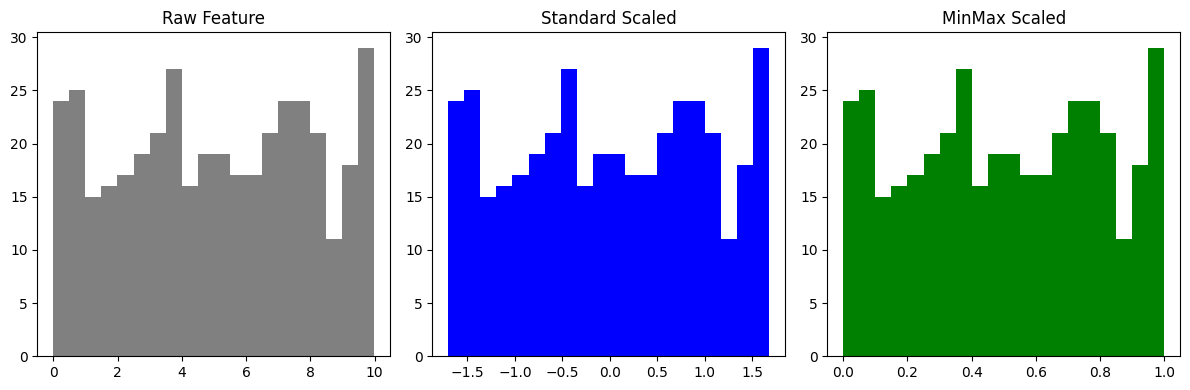

In [6]:
#  (c) Visualize feature distribution before and after scaling
import matplotlib.pyplot as plt

feature_index = 0  # e.g., CRIM

plt.figure(figsize=(12, 4))

# Raw
plt.subplot(1, 3, 1)
plt.hist(X_train.iloc[:, feature_index], bins=20, color='gray')
plt.title("Raw Feature")

# Standard Scaled
plt.subplot(1, 3, 2)
plt.hist(X_train_std[:, feature_index], bins=20, color='blue')
plt.title("Standard Scaled")

# MinMax Scaled
plt.subplot(1, 3, 3)
plt.hist(X_train_mm[:, feature_index], bins=20, color='green')
plt.title("MinMax Scaled")

plt.tight_layout()
plt.show()


In [7]:
# Task3
from sklearn.datasets import fetch_california_housing

# Load California housing dataset
california = fetch_california_housing()
X_cal = pd.DataFrame(california.data, columns=california.feature_names)
y_cal = california.target

# Train-test split
X_train_cal, X_test_cal, y_train_cal, y_test_cal = train_test_split(X_cal, y_cal, test_size=0.2, random_state=42)

# Apply Standard Scaling
X_train_cal_scaled = scaler_standard.fit_transform(X_train_cal)
X_test_cal_scaled = scaler_standard.transform(X_test_cal)

# Train model
train_model(X_train_cal_scaled, y_train_cal, X_test_cal_scaled, y_test_cal, "California Housing (StandardScaler)")


California Housing (StandardScaler) - MSE on test set: 0.2540
